In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [2]:
eeg_data_df = pd.read_csv("eeg_data.csv")
eeg_demo_df = pd.read_csv("demographic_info.csv")

eeg_data_df

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


In [3]:
eeg_demo_df

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M
5,5,24,Han Chinese,M
6,6,24,Han Chinese,M
7,7,25,Han Chinese,M
8,8,25,Han Chinese,M
9,9,24,Han Chinese,F


Merge the EEG and Demographic Dataframes

In [4]:
eeg_data_df = eeg_data_df.rename(columns={"SubjectID":"subject ID"})
eeg_data_df = eeg_data_df.astype({"subject ID":'int32'})
eeg_df = eeg_demo_df.merge(eeg_data_df, copy=True)

eeg_df

,subject ID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,25,Han Chinese,M,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0,25,Han Chinese,M,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0,25,Han Chinese,M,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0,25,Han Chinese,M,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0,25,Han Chinese,M,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9,24,Han Chinese,F,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9,24,Han Chinese,F,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9,24,Han Chinese,F,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9,24,Han Chinese,F,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


Create New Dataframe

In [5]:
df2 = eeg_df[['Alpha1','Alpha2','user-definedlabeln','VideoID']]
print(df2)

         Alpha1    Alpha2  user-definedlabeln  VideoID
0       33735.0   23991.0                 0.0      0.0
1        1439.0    2240.0                 0.0      0.0
2      201999.0   62107.0                 0.0      0.0
3       61236.0   17084.0                 0.0      0.0
4       37102.0   88881.0                 0.0      0.0
...         ...       ...                 ...      ...
12806     709.0   21732.0                 0.0      9.0
12807  153171.0  145805.0                 0.0      9.0
12808   40068.0   39122.0                 0.0      9.0
12809   11444.0    9932.0                 0.0      9.0
12810   50014.0  124208.0                 0.0      9.0

[12811 rows x 4 columns]


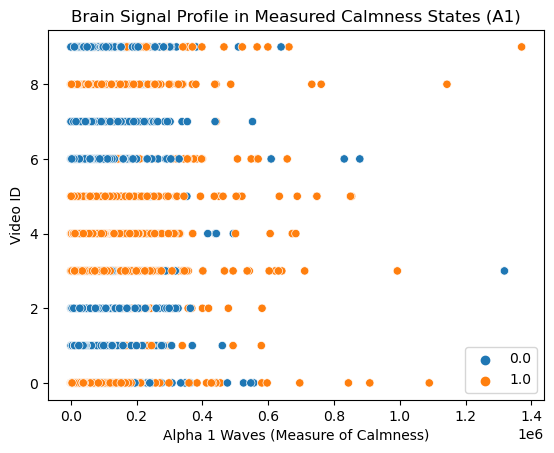

In [8]:
sns.scatterplot(data=df2,x="Alpha1",y="VideoID",hue="user-definedlabeln")

plt.legend()
plt.xlabel("Alpha 1 Waves (Measure of Calmness)")
plt.ylabel("Video ID")
plt.title("Brain Signal Profile in Measured Calmness States (A1)")
plt.show()

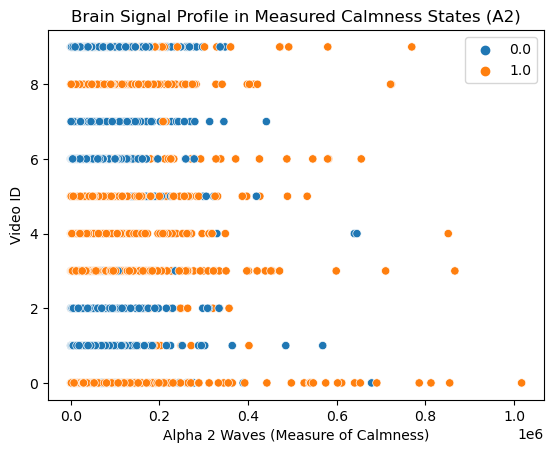

In [9]:
sns.scatterplot(data=df2,x="Alpha2",y="VideoID",hue="user-definedlabeln")

plt.legend()
plt.xlabel("Alpha 2 Waves (Measure of Calmness)")
plt.ylabel("Video ID")
plt.title("Brain Signal Profile in Measured Calmness States (A2)")
plt.show()

<AxesSubplot:title={'center':'Alpha1'}, xlabel='user-definedlabeln'>

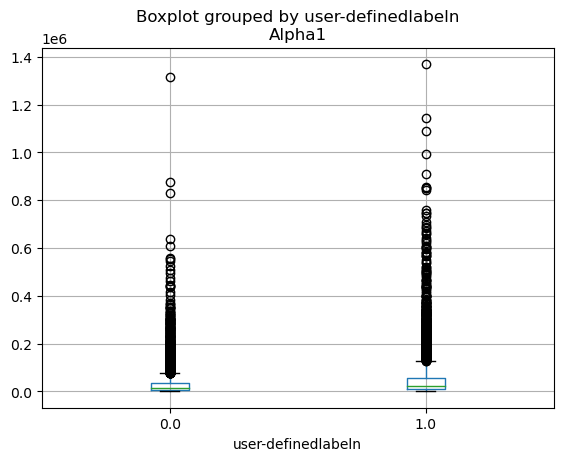

In [12]:
df2.boxplot("Alpha1", by="user-definedlabeln")



<AxesSubplot:title={'center':'Alpha2'}, xlabel='user-definedlabeln'>

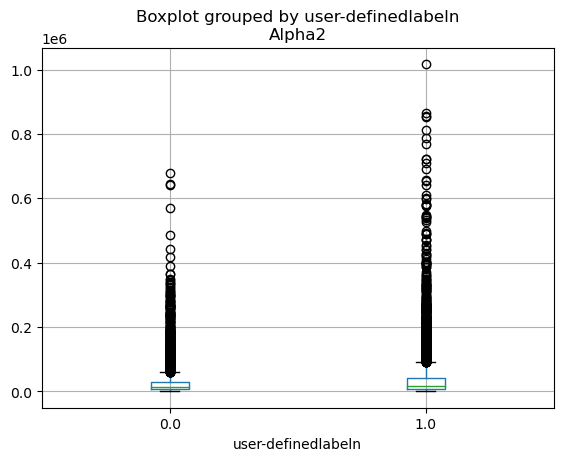

In [13]:
df2.boxplot("Alpha2", by="user-definedlabeln")

Are calm students more likely to be confused?  

My hypothesis is calm students are more likely to be confused.    
The above scatter plot depicts the relationship between user-defined confused states vs. unconfused states amongst students and calmness (based on Alpha 1 and Alpha 2 waves) upon reviewing learning video clips.  The orange dots represent viewer confusion, and the blue dots represent when viewers are not confused.  In regards to video selection, videos 0 through 4 were pre-defined as being less confusing, as they covered topics such as basic algebra or geometry.  Videos 5 through 9 were pre-defined as not confusing, as they covered topics such as Quantum Mechanics and Stem Cell Research.  To add additional confusion, the 2 minute video clips shown to students were chopped in the middle.  As a person is calmer, there is an increase in the frequency of alpha waves.  
In range 0 to 0.2 UV/Hz (1e6) alpha waves, the majority of confused vs. not confused responses are captured.  Regardless of the state of calmness or pre-defined level of confusion by video type, students confusion states varied within this range.  In range 0.2 to 0.6 UV/Hz (1e6) alpha waves, the majority of the responses captured were confused.      
In the boxplot chart, a User Defined Label equivalent to 0 represents the student not being confused, and a User Defined Label equivalent to 1 represents the student being confused.  The highest concentration of unconfused responses is within 0 to 0.6 UV/Hz (1e6) alpha waves range.  However, the concentration of confused responses is within 0 to 0.8 UV/Hz (1e6) alpha waves range, and it has more outliers under this category.    

Based on the scatter plot and boxplot charts returned, students who are very calm (or very relaxed) are more likely to be confused.  
